<a href="https://colab.research.google.com/github/nandinib1999/edureka-assignments/blob/main/Edureka_NLP_Assignment_1_Part_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
nltk.download('punkt')

def Tokenize(text):
  sents = sent_tokenize(text)
  all_words = []
  for sent in sents:
    words = word_tokenize(sent)
    words = [x.lower() for x in words]
    all_words.extend(words)
  
  word_freq_count = Counter(all_words)
  print("word_freq_count:", word_freq_count)
  least_common = word_freq_count.most_common()[-5:]
  print("5 least occuring tokens:", least_common)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
user_input = input()
Tokenize(user_input)

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose
word_freq_count: Counter({',': 6, 'a': 5, 'it': 3, 'the': 3, 'of': 3, '.': 3, 'ipsum': 3, 'is': 2, 'that': 2, 'will': 2, 'by': 2, 'readable': 2, 'content': 2, 'page': 2, 'using': 2, 'lorem': 2, 'as': 2, 'here': 2, "'": 2, 'many': 2, 'and': 2, 'web': 2, 'their': 2, 'sometimes': 2, 'long': 1, 'established': 1, 'fact': 1, 'reader': 1, 'be': 1, 'distracted': 1, 'when': 1, 'looking': 1, 'at': 1, 'its': 1, 'layout': 1, '

In [30]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
nltk.download('stopwords')
stop_words = stopwords.words('english')

def RemoveStopWords(text):
  filtered_sentence = [w.lower() for w in text.split(" ") if not w.lower() in stop_words]
  stop_words_in_sent = [w.lower() for w in text.split(" ") if w.lower() in stop_words]
  word_freq_count = Counter(stop_words_in_sent)
  print("stopword frequency count")
  for stop, cnt in word_freq_count.items():
    print(stop, '->', cnt)
  plt.figure(figsize=(15, 5))
  plt.bar(word_freq_count.keys(), word_freq_count.values())
  plt.xticks(rotation=90)
  plt.title("Stopword count")
  plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


There are many variations of passages of Lorem Ipsum available, but the majority have suffered alteration in some form, by injected humour, or randomised words which don't look even slightly believable. If you are going to use a passage of Lorem Ipsum, you need to be sure there isn't anything embarrassing hidden in the middle of text. All the Lorem Ipsum generators on the Internet tend to repeat predefined chunks as necessary, making this the first true generator on the Internet. It uses a dictionary of over 200 Latin words, combined with a handful of model sentence structures, to generate Lorem Ipsum which looks reasonable. The generated Lorem Ipsum is therefore always free from repetition, injected humour, or non-characteristic words etc.
stopword frequency count
there -> 2
are -> 2
of -> 6
but -> 1
the -> 7
have -> 1
in -> 2
some -> 1
by -> 1
or -> 2
which -> 2
don't -> 1
if -> 1
you -> 2
to -> 4
a -> 3
be -> 1
isn't -> 1
all -> 1
on -> 2
as -> 1
this -> 1
it -> 1
over -> 1
with -> 

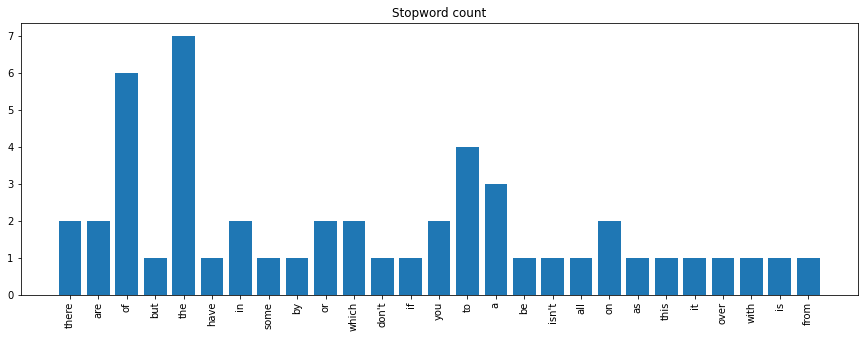

In [31]:
user_input = input()
RemoveStopWords(user_input)

In [40]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import pandas as pd
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

def Lemmatize(text):
  lemma_words = [[x, lemmatizer.lemmatize(x).lower()] for x in text.split(" ")]
  return lemma_words

def Stemmed(text):
  stemmed_words = [[x, ps.stem(x)] for x in text.split(" ")]
  return stemmed_words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
import re

user_input = input()
# Removing all punctuations and special characters from the string as they might 
# hinder the process of Stemming and Lemmatization
user_input = re.sub('[^a-zA-Z0-9\s]', "", user_input)
lemma_words = Lemmatize(user_input)
stemmed_words = Stemmed(user_input)
df_lst = []
print("Word\tLemma\tStem")
for (word, lemma), (word_x, stemmed) in zip(lemma_words, stemmed_words):
  print(word, '->', lemma, '->', stemmed)
  df_lst.append([word, lemma, stemmed])

df = pd.DataFrame(df_lst, columns=["Original Word", "Lemmatized Form", "Stemmed Form"])
df.to_csv("word_lemma_stem.csv", index=False)

There are many variations of passages of Lorem Ipsum available, but the majority have suffered alteration in some form, by injected humour, or randomised words which don't look even slightly believable. If you are going to use a passage of Lorem Ipsum, you need to be sure there isn't anything embarrassing hidden in the middle of text. All the Lorem Ipsum generators on the Internet tend to repeat predefined chunks as necessary, making this the first true generator on the Internet. It uses a dictionary of over 200 Latin words, combined with a handful of model sentence structures, to generate Lorem Ipsum which looks reasonable. The generated Lorem Ipsum is therefore always free from repetition, injected humour, or non-characteristic words etc.
Word	Lemma	Stem
There -> there -> there
are -> are -> are
many -> many -> mani
variations -> variation -> variat
of -> of -> of
passages -> passage -> passag
of -> of -> of
Lorem -> lorem -> lorem
Ipsum -> ipsum -> ipsum
available -> available -> av

In [48]:
df.head(10)

,Original Word,Lemmatized Form,Stemmed Form
0,There,there,there
1,are,are,are
2,many,many,mani
3,variations,variation,variat
4,of,of,of
5,passages,passage,passag
6,of,of,of
7,Lorem,lorem,lorem
8,Ipsum,ipsum,ipsum
9,available,available,avail
